In [4]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import numpy as np

import matplotlib.style as style
from matplotlib import pyplot as plt
style.use('fivethirtyeight')
rc={'font.family': ['avenir'],
    'axes.edgecolor': '0',
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.titleweight':'bold',
    'axes.labelsize':15,
    'axes.labelcolor': '0',
    'axes.labelpad':10,
    'axes.titlesize': 20,
    'axes.titlepad':15,
    'font.family': ['Avenir'],
    'axes.facecolor':'#f2f2f2', 
    'figure.facecolor':'white',
    'ytick.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.major.pad': 0,
    'xtick.major.pad': 5,
    'ytick.left': True,
    'xtick.bottom': True,
    'xtick.minor.width': 100,
    'xtick.color':'0'}


sns.set(font_scale=1, rc=rc)

In [5]:
songList = pd.read_csv('songlistFeatures3.csv',index_col=0)

In [6]:
moods = ['happy','sad','energetic','calm']
for x in moods:
    print(x,': ',len(songList[songList['p_mood']==x]))

happy :  1474
sad :  1877
energetic :  1330
calm :  1564


In [7]:
a = list(songList.columns)
songList[a]

,p_mood,p_creator,p_name,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
0,energetic,Spotify,Working Out Together: HAIM,0.483187,0.092616,10.770929,0.092616,-23.498857,60.478241,0.236238,3.390000e-06
1,energetic,Spotify,Working Out Together: HAIM,0.231542,0.093134,2.410889,0.093134,-19.553286,111.807440,0.455515,4.440000e-05
2,energetic,Spotify,Working Out Together: HAIM,0.250780,0.099969,-9.241319,0.099969,-40.136095,40.613624,0.248599,2.560000e-07
3,energetic,Spotify,Working Out Together: HAIM,0.440183,0.086316,11.225925,0.086316,-35.925357,163.086405,0.255102,5.180000e-07
4,energetic,Spotify,Working Out Together: HAIM,0.295903,0.100431,-0.188845,0.100431,-34.509762,46.161687,0.262328,1.300000e-06
...,...,...,...,...,...,...,...,...,...,...,...
6240,sad,bella renas,Sad boys Sad Rap,0.407325,0.090691,8.058014,0.090691,-20.517286,160.007719,0.228980,1.860000e-06
6241,sad,bella renas,Sad boys Sad Rap,0.269550,0.108243,-31.620863,0.108243,-38.180810,15.911584,0.172101,7.180000e-06
6242,sad,bella renas,Sad boys Sad Rap,0.371050,0.093874,-15.910853,0.093874,-24.482548,8.394590,0.222993,8.300000e-06
6243,sad,bella renas,Sad boys Sad Rap,0.327746,0.091288,16.657899,0.091288,-25.722810,30.115463,0.387131,5.530000e-06


In [8]:
group_by_mood = songList.groupby(by=['p_mood'])
group_by_mood.count()

,p_creator,p_name,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
p_mood,,,,,,,,,,
calm,1564,1564,1564,1564,1564,1564,1564,1564,1564,1564
energetic,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
happy,1474,1474,1474,1474,1474,1474,1474,1474,1474,1474
sad,1877,1877,1877,1877,1877,1877,1877,1877,1877,1877


In [9]:
group_by_mood = songList.groupby(by=['p_mood'])
group_by_mood.describe()

pitch_mean                                                    \
               count      mean       std       min       25%       50%   
p_mood                                                                   
calm          1564.0  0.274426  0.067679  0.120000  0.224894  0.263520   
energetic     1330.0  0.318813  0.077795  0.158151  0.263591  0.302680   
happy         1474.0  0.311764  0.077035  0.147915  0.256185  0.298904   
sad           1877.0  0.257943  0.057213  0.121151  0.218750  0.247496   

                              pitch_variance            ... rhythm_mean  \
                75%       max          count      mean  ...         75%   
p_mood                                                  ...               
calm       0.312393  0.601589         1564.0  0.094705  ...    0.349391   
energetic  0.362499  0.744022         1330.0  0.093030  ...    0.256444   
happy      0.355775  0.743927         1474.0  0.091814  ...    0.293875   
sad        0.285304  0.550062         1877.0  0.093157  ...    0.326109   

                    rhythm_variance                                    \
                max           count      mean       std           min   
p_mood                                                                  
calm       0.629424          1564.0  0.002410  0.005602  4.910000e-08   
energetic  0.455515          1330.0  0.000567  0.002365  7.980000e-08   
happy      0.475369          1474.0  0.000557  0.002142  5.350000e-08   
sad        0.591497          1877.0  0.002596  0.005652  3.240000e-07   

                                                   
                25%       50%       75%       max  
p_mood                                             
calm       0.000005  0.000018  0.000169  0.086102  
energetic  0.000001  0.000005  0.000011  0.018325  
happy      0.000001  0.000005  0.000015  0.021014  
sad        0.000007  0.000027  0.001529  0.048636  

[4 rows x 64 columns]

In [10]:
songList.corr()

,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
pitch_mean,1.000000,0.044720,0.389561,0.044720,0.177342,0.132017,-0.086618,-0.076439
pitch_variance,0.044720,1.000000,-0.208557,1.000000,-0.107781,0.092899,0.045257,0.032944
timbre_mean,0.389561,-0.208557,1.000000,-0.208557,0.375464,0.244283,-0.138714,-0.128743
timbre_variance,0.044720,1.000000,-0.208557,1.000000,-0.107781,0.092899,0.045257,0.032944
intensity_mean,0.177342,-0.107781,0.375464,-0.107781,1.000000,0.104058,-0.143771,-0.148760
intensity_variance,0.132017,0.092899,0.244283,0.092899,0.104058,1.000000,-0.049458,-0.056436
rhythm_mean,-0.086618,0.045257,-0.138714,0.045257,-0.143771,-0.049458,1.000000,0.329806
rhythm_variance,-0.076439,0.032944,-0.128743,0.032944,-0.148760,-0.056436,0.329806,1.000000


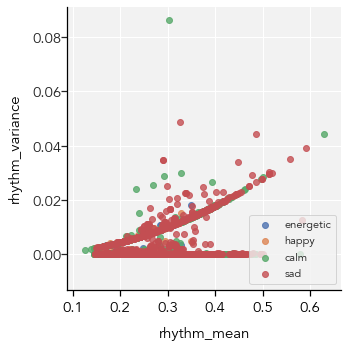

In [11]:
# library & dataset
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="rhythm_mean", y="rhythm_variance", data=songList, fit_reg=False, hue='p_mood', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 

In [12]:
songList.sample(frac=1)

,p_mood,p_creator,p_name,pitch_mean,pitch_variance,timbre_mean,timbre_variance,intensity_mean,intensity_variance,rhythm_mean,rhythm_variance
5485,sad,Spiid3r,Sad Boi Hours,0.198012,0.079620,-18.508306,0.079620,-28.306119,46.373564,0.223902,8.530000e-06
3097,calm,Spotify,Lo-Fi Beats,0.303810,0.098384,-1.435444,0.098384,-35.853214,50.993617,0.366260,1.490325e-02
21,energetic,Spotify,Working Out Together: HAIM,0.265079,0.109772,-0.710075,0.109772,-30.124667,105.491053,0.234803,7.070000e-06
3789,calm,Spotify,Chill Tracks,0.222435,0.097550,-14.315232,0.097550,-29.820690,53.627637,0.291235,1.470000e-07
1412,happy,Spotify,Happy Hits!,0.240514,0.079125,5.281111,0.079125,-27.824143,86.917240,0.285958,7.100000e-06
...,...,...,...,...,...,...,...,...,...,...,...
2812,calm,Spotify,Chill Hits,0.257018,0.093879,-12.298278,0.093879,-27.401929,124.020866,0.311938,2.740000e-05
2204,happy,Spotify,Feel Good Indie Rock,0.240363,0.087710,3.019040,0.087710,-29.491714,64.893311,0.256531,2.830000e-06
5431,sad,Spiid3r,Sad Boi Hours,0.274016,0.090571,12.863581,0.090571,-17.538786,118.683368,0.249487,7.620000e-06
2474,happy,Spotify,Wake Up Happy,0.259565,0.096460,12.460476,0.096460,-24.080500,108.842802,0.200823,9.700000e-06


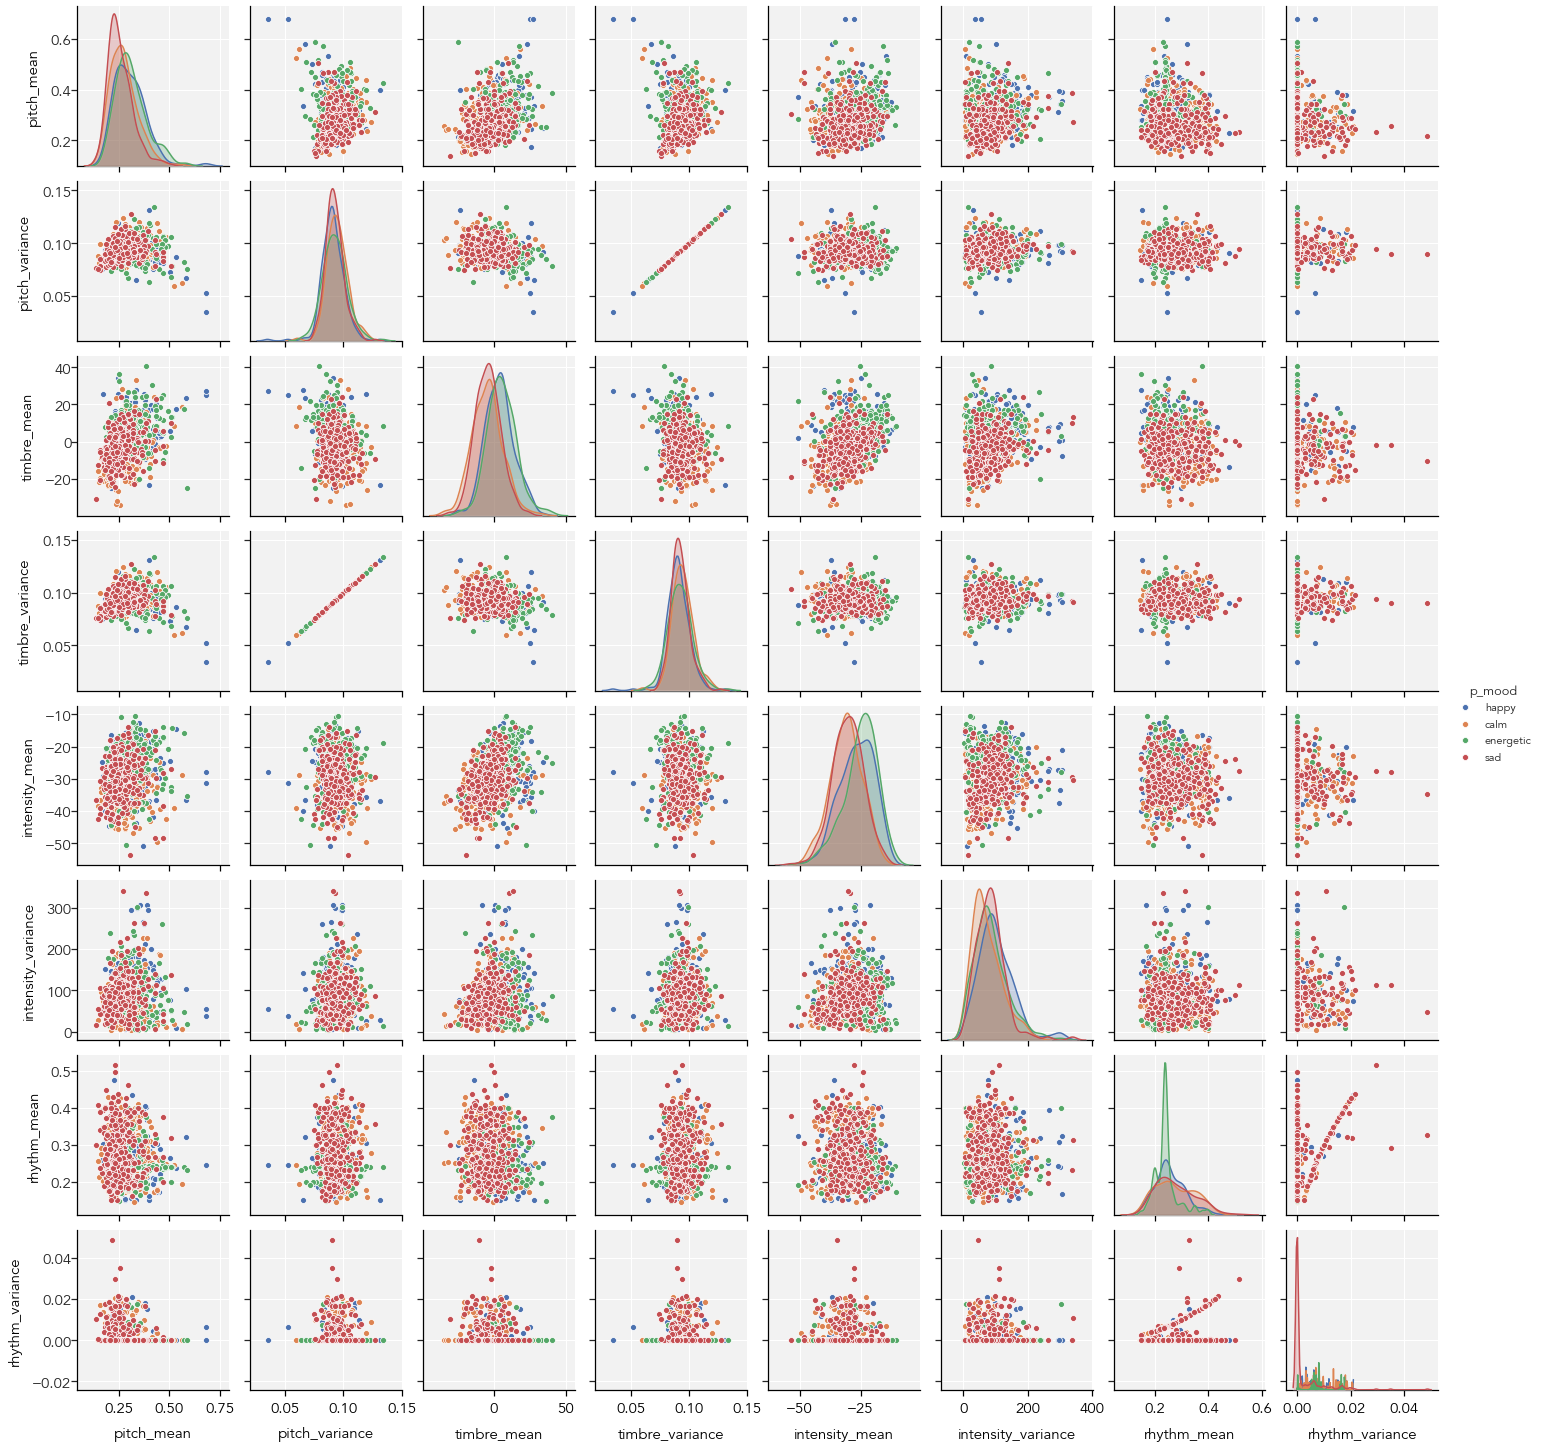

In [20]:
sns.pairplot(songList.sample(frac=1)[:1000],hue="p_mood")
plt.savefig('dataset2pairplot.png')
plt.show()

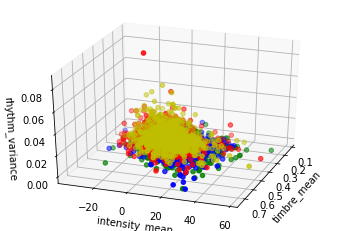

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

x = songList['pitch_mean'].to_numpy()
y = songList['timbre_mean'].to_numpy()
z = songList['rhythm_variance'].to_numpy()
col = songList['p_mood'].map({'happy':'b','energetic':'g','calm':'r','sad':'y'}).to_numpy()


ax.scatter(x, y, z, c=col, marker='o')

ax.set_xlabel('timbre_mean')
ax.set_ylabel('intensity_mean')
ax.set_zlabel('rhythm_variance')

ax.view_init(30, 20)


plt.show()


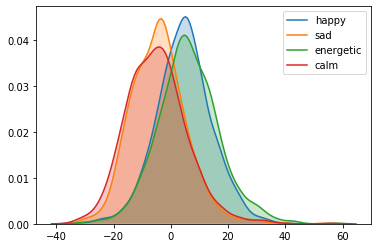

In [81]:
moods = ['happy','sad','energetic','calm']
for mood in moods:
    sns.kdeplot(songList[songList['p_mood']==mood]['timbre_mean'], shade=True,label=mood)

Index(['p_mood', 'p_creator', 'p_name', 'pitch_mean', 'pitch_variance',
       'timbre_mean', 'timbre_variance', 'intensity_mean',
       'intensity_variance', 'rhythm_mean', 'rhythm_variance'],
      dtype='object')
pitch_mean


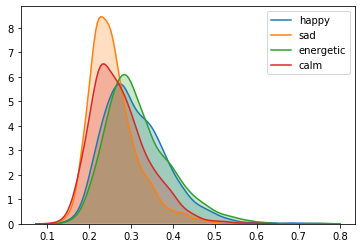

pitch_variance


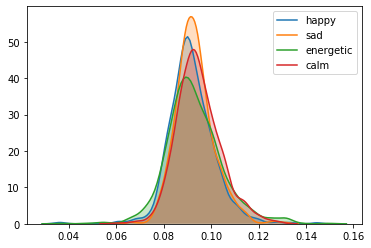

timbre_mean


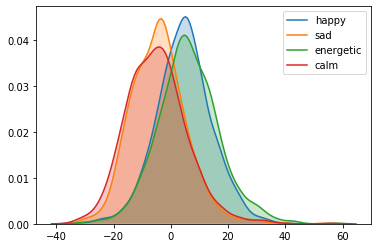

timbre_variance


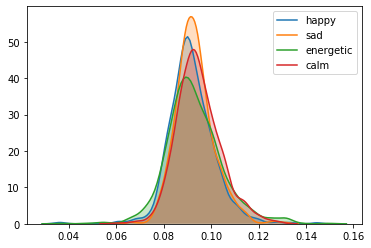

intensity_mean


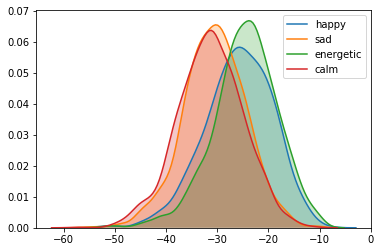

intensity_variance


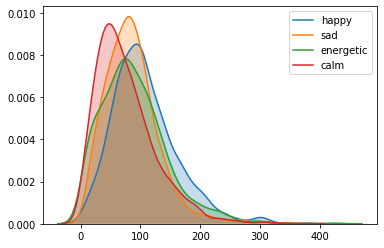

rhythm_mean


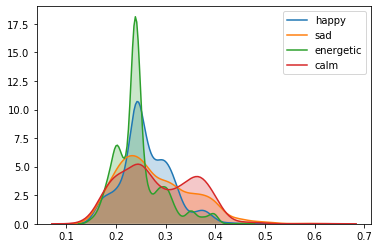

rhythm_variance


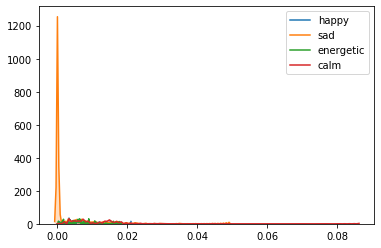

In [76]:
a = songList.dtypes == 'float64'
print(a.index)
for x in range(len(a)):
    
    if(a[x]):
        try:
            print(a.index[x])
            for mood in moods:
                g = sns.kdeplot(songList[songList['p_mood']==mood][a.index[x]], shade=True,label=mood)
            plt.show(g)
        except:
            print("didnt work")

happy


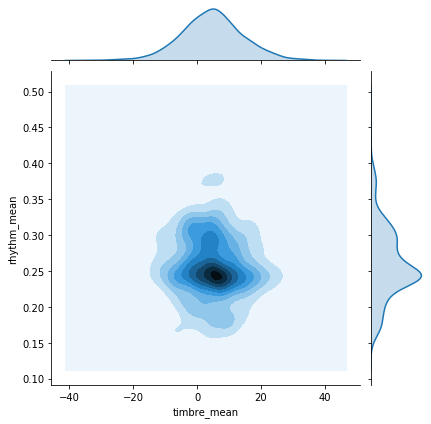

sad


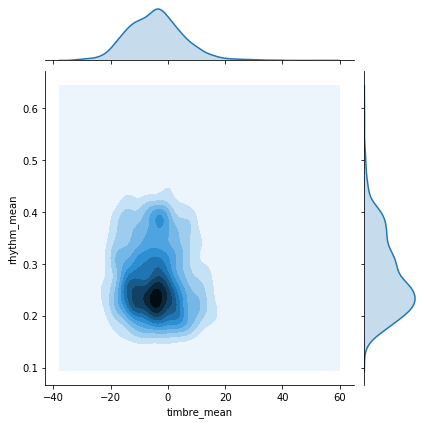

energetic


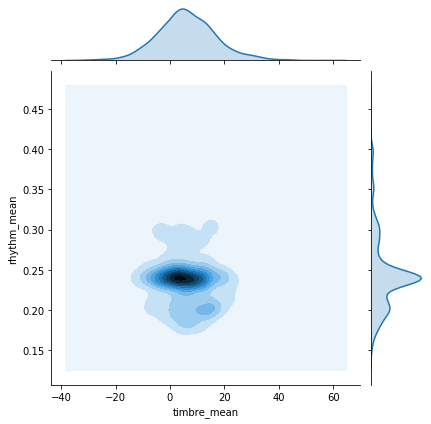

calm


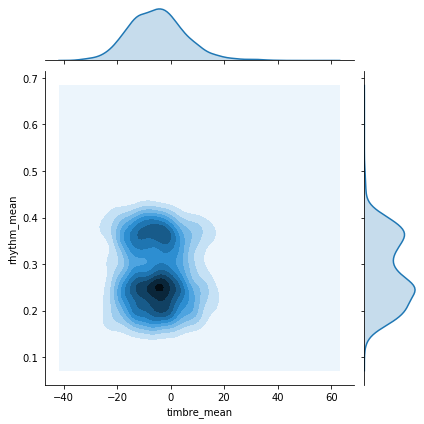

In [20]:
moods = ['happy','sad','energetic','calm']
for mood in moods:
    print(mood)
    g = sns.jointplot("timbre_mean", "rhythm_mean", data=songList[songList['p_mood']==mood], kind='kde');
    plt.show(g)

Index(['p_mood', 'p_creator', 'p_name', 'pitch_mean', 'pitch_variance',
       'timbre_mean', 'timbre_variance', 'intensity_mean',
       'intensity_variance', 'rhythm_mean', 'rhythm_variance'],
      dtype='object')
0       False
1       False
2       False
3       False
4       False
        ...  
6240    False
6241    False
6242    False
6243    False
6244    False
Name: p_mood, Length: 6245, dtype: bool


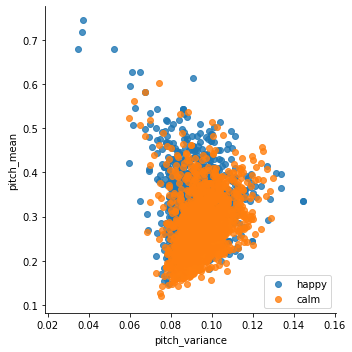

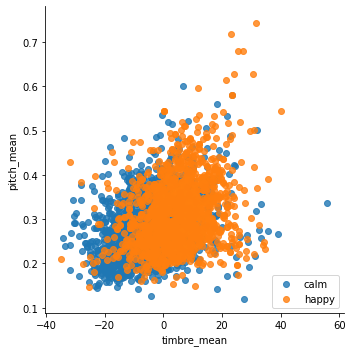

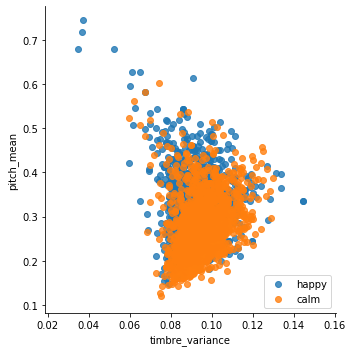

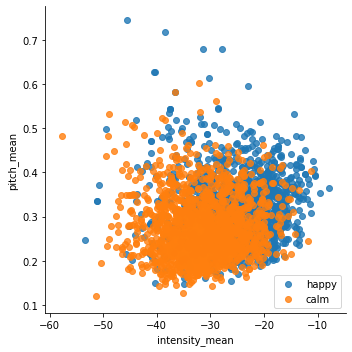

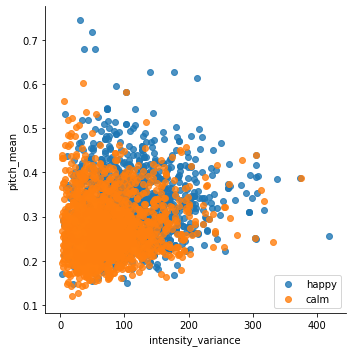

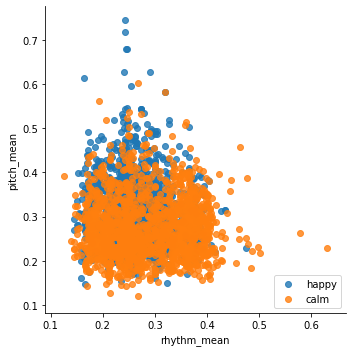

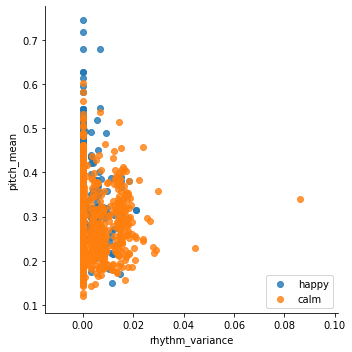

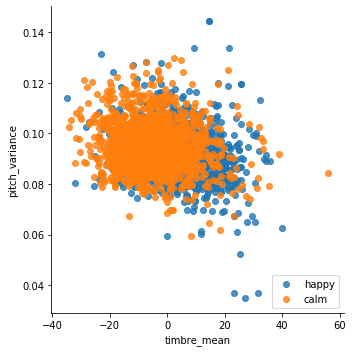

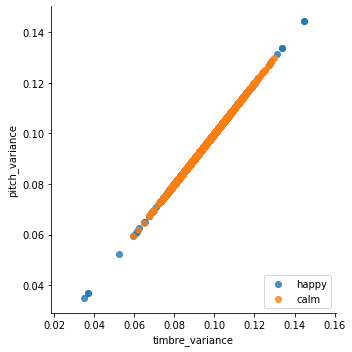

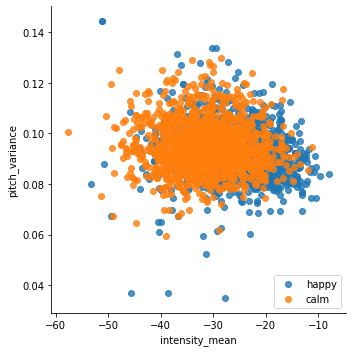

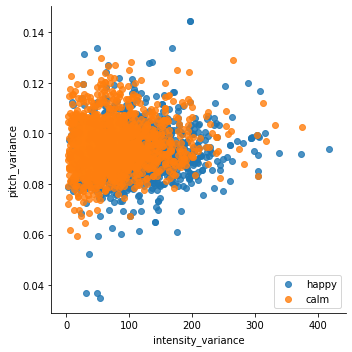

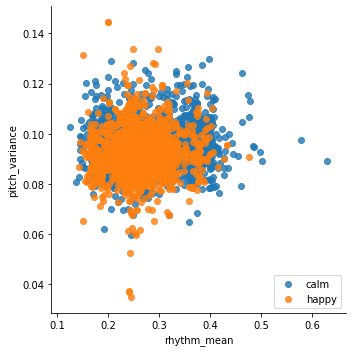

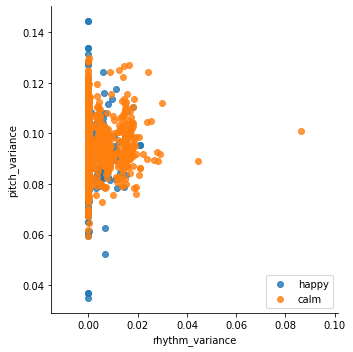

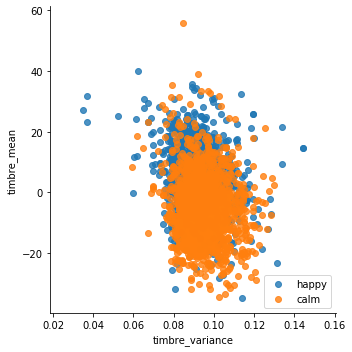

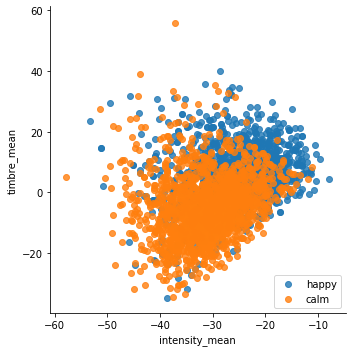

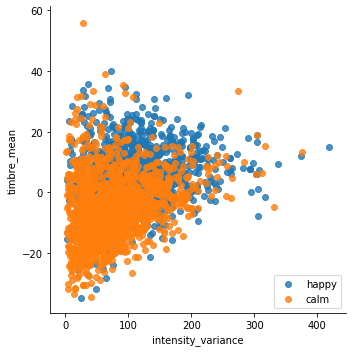

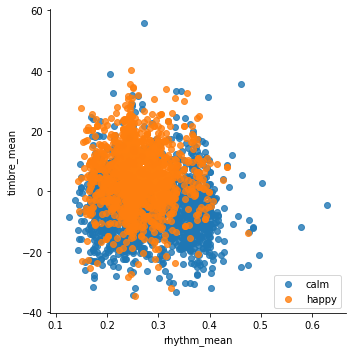

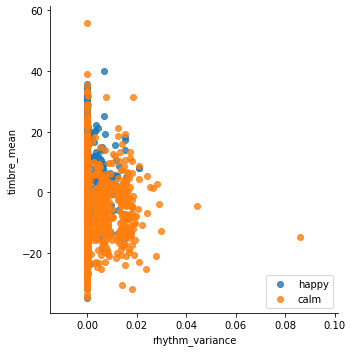

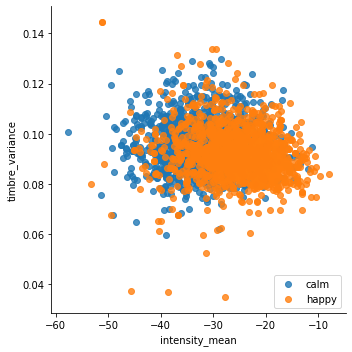

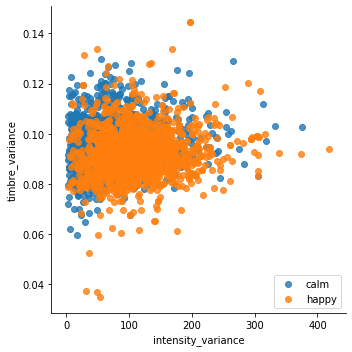

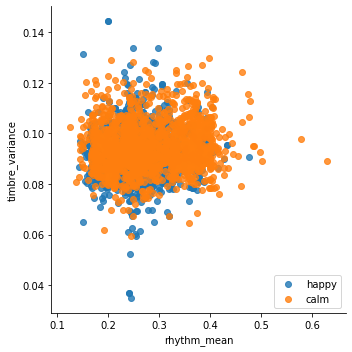

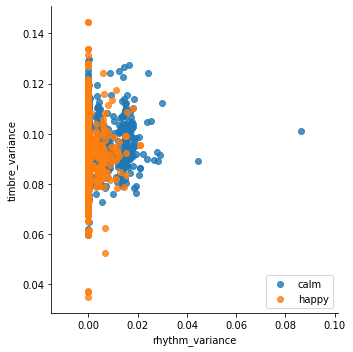

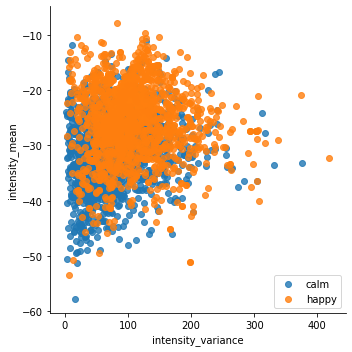

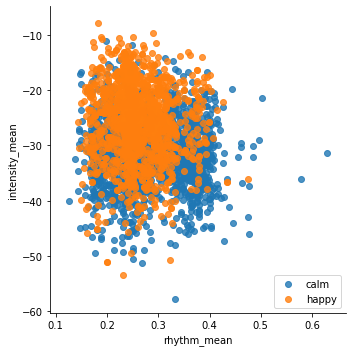

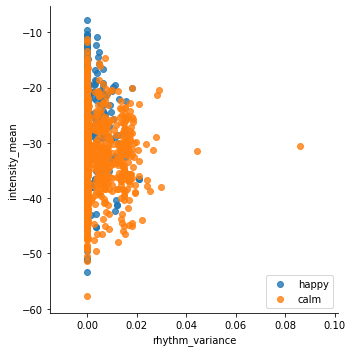

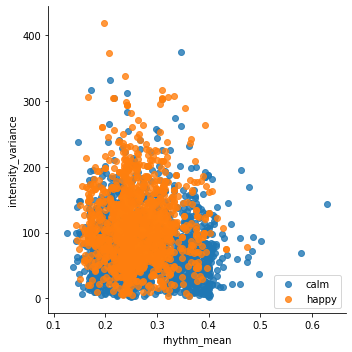

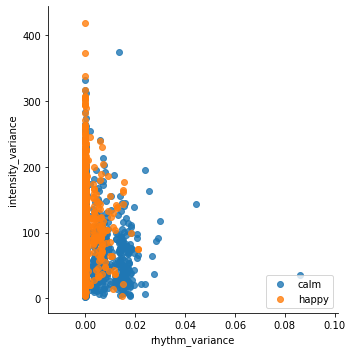

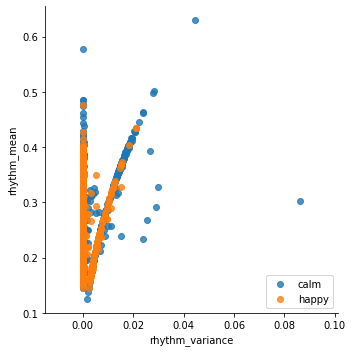

In [147]:
a = songList.dtypes == 'float64'
print(a.index)
desiredMoods = ['calm','happy']
correctMood = songList.p_mood.isin(desiredMoods)
print(correctMood)
for y in range(len(a)):
    for x in range(y+1,len(a)):
        if(a[x] and a[y]):
            try:
                g = sns.lmplot( x=a.index[x], y=a.index[y], data=songList[correctMood].sample(frac=1), fit_reg=False, hue='p_mood', legend=False)
                plt.legend(loc='lower right')
                plt.show(g)
            except:
                print("didnt work")



In [21]:
cols = ['p_mood','pitch_mean','pitch_variance','timbre_mean','timbre_variance','intensity_mean','intensity_variance','rhythm_mean','rhythm_variance']

In [29]:
def getscore(num_steps, data, y_vals, printConf):
    X = data.loc[:,data.columns != 'p_mood'].to_numpy()
    y = y_vals.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    clf = RandomForestClassifier(max_depth=num_steps).fit(X_train,y_train)
    if(printConf):
        data = {'y_Actual':    y_test,
            'y_Predicted': clf.predict(X_test)
            }
        df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
        confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
        confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)*100
        sns.heatmap(confusion_matrix, annot=True,fmt='.3g')
        plt.title("Decision Tree Confusion Matrix")
        plt.tight_layout()
        plt.savefig("3dataset2DecisionTreeConfusionMatrix.png")
        plt.show()
        print("Gini Impurity")
        for index, row in confusion_matrix.iterrows():
            s = row.sum()
            cur = 0
            for x in range(len(row)):
                curVal = row.get(x)
                cur += curVal/s*(1-curVal/s)
            print(cur)
    return [num_steps, clf.score(X_test,y_test), clf.score(X_train,y_train)]

num_steps      8.000000
test_score     0.503202
train_score    0.716312
Name: 7, dtype: float64


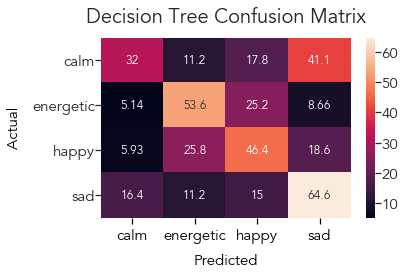

Gini Impurity
0.697406400547184
0.5790323685259878
0.6579106617411026
0.5830361840431305


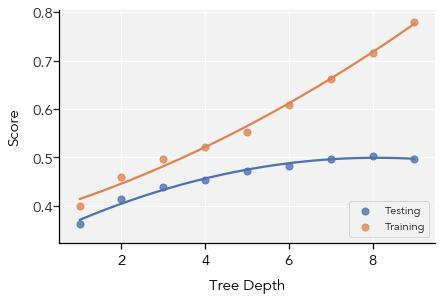

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


num_steps      8.000000
test_score     0.484525
train_score    0.685884
Name: 7, dtype: float64


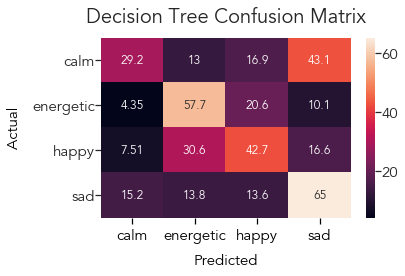

Gini Impurity
0.69694827830109
0.549743872782444
0.6740430467532222
0.5827618820876574


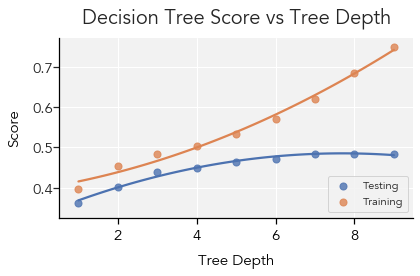

In [30]:
cols = ['p_mood','pitch_mean','pitch_variance','timbre_mean','timbre_variance','intensity_mean','intensity_variance','rhythm_mean','rhythm_variance']
scoreData = pd.DataFrame(columns=['num_steps','test_score','train_score'])
data = songList[cols]
for x in range(1,10):
    scoreData.loc[len(scoreData)] = getscore(x,data, songList['p_mood'],False)

print(scoreData.iloc[scoreData['test_score'].idxmax,:])
getscore(scoreData.iloc[scoreData['test_score'].idxmax,:]['num_steps'],data, songList['p_mood'],True)

g = sns.regplot(x='num_steps',y='test_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None,label="Testing")
g = sns.regplot(x='num_steps',y='train_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None,label="Training")
g.set_ylabel("Score")
g.set_xlabel("Tree Depth")
plt.legend(loc='lower right')
plt.show(g)
scoreData




cols = ['p_mood','pitch_mean','timbre_mean','intensity_mean','rhythm_mean','rhythm_variance']
scoreData = pd.DataFrame(columns=['num_steps','test_score','train_score'])
data = songList[cols]
data['rhythm_variance_squared'] = data['rhythm_variance']*data['rhythm_variance']
for x in range(1,10):
    scoreData.loc[len(scoreData)] = getscore(x,data, songList['p_mood'],False)

print(scoreData.iloc[scoreData['test_score'].idxmax,:])
getscore(scoreData.iloc[scoreData['test_score'].idxmax,:]['num_steps'],data, songList['p_mood'],True)

g = sns.regplot(x='num_steps',y='test_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Testing")
g = sns.regplot(x='num_steps',y='train_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None, label="Training")
g.set_title("Decision Tree Score vs Tree Depth")
g.set_ylabel("Score")
g.set_xlabel("Tree Depth")
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig("dataset2DecisionTreeOverfitting.png")
plt.show(g)


In [31]:
clf = RandomForestClassifier(max_depth = 4)
cross_val_score(clf, songList[cols].to_numpy(), songList['p_mood'].to_numpy(), cv=5)

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'energetic'

  FitFailedWarning)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'energetic'

  FitFailedWarning)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'energetic'

  FitFailedWarning)
/Users/admin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_sele

array([nan, nan, nan, nan, nan])

In [32]:
scoreData = pd.DataFrame(columns=['num_steps','test_score','train_score'])
data = songList[songList['p_mood'] != 'energetic'][cols]
y_vals = songList[songList['p_mood'] != 'energetic']['p_mood']
for x in range(1,10):
    scoreData.loc[len(scoreData)] = getscore(x,data,y_vals)
data
print(scoreData.iloc[3,:])
g = sns.regplot(x='num_steps',y='test_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
g = sns.regplot(x='num_steps',y='train_score',data=scoreData, scatter_kws={"s": 50}, order=2, ci=None)
plt.show(g)
scoreData

TypeError: getscore() missing 1 required positional argument: 'printConf'

## SGD Classifier

In [141]:
param_grid = [
    {'max_iter':[500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700],'tol':[1e-3]}
]

clf = linear_model.SGDClassifier()

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(songList[cols].to_numpy(), songList['p_mood'].to_numpy())
#clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
#cross_val_score(clf, songList[cols].to_numpy(), songList['p_mood'].to_numpy(), cv=5)

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_iter': [500, 600, 700, 800, 900, 1000, 1100,
                                       1200, 1300, 1400, 1500, 1600, 1700],
                          'tol': [0.001]}],
             

In [145]:
grid_search.best_estimator_.score(songList[cols].to_numpy(),songList['p_mood'].to_numpy())

0.2799039231385108

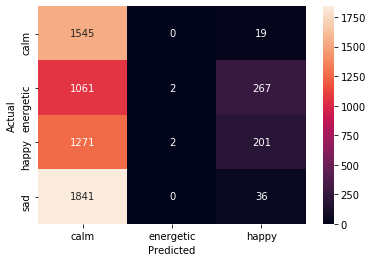

Gini Impurity
0.024001510979127567
0.3233003561535418
0.23787716162004824
0.037623373995104945


In [146]:
data = {'y_Actual':    songList['p_mood'].to_numpy(),
        'y_Predicted': grid_search.best_estimator_.predict(songList[cols].to_numpy())
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.show()
print("Gini Impurity")
for index, row in confusion_matrix.iterrows():
    s = row.sum()
    cur = 0
    for x in range(len(row)):
        curVal = row.get(x)
        cur += curVal/s*(1-curVal/s)
    print(cur)

In [129]:
grid_search.best_estimator_.classes_

array(['calm', 'energetic', 'happy', 'sad'], dtype='<U9')

In [138]:
for x in grid_search.best_estimator_.predict(songList[cols].to_numpy()):
    print(x)
print(np.unique(grid_search.best_estimator_.predict(songList[cols].to_numpy())))

energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
energetic
energetic
calm
calm
energetic
calm
calm
calm
calm
calm
energetic
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
happy
calm
energetic
calm
calm
happy
calm
calm
energetic
energetic
energetic
calm
energetic
calm
calm
calm
energetic
calm
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
calm
happy
calm
calm
energetic
calm
energetic
calm
calm
calm
calm
calm
calm
energetic
energetic
calm
calm
calm
calm
calm
energetic
energetic
calm
energetic
energetic
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
energetic
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
energetic
calm
calm
calm
calm
calm
calm
energetic
calm
energetic
happy
c

energetic
happy
calm
calm
energetic
energetic
energetic
energetic
calm
energetic
calm
happy
calm
energetic
calm
calm
energetic
calm
energetic
calm
calm
calm
calm
calm
calm
happy
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
happy
happy
calm
calm
energetic
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
happy
happy
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
calm
calm
energetic
calm
calm
calm
happy
happy
happy
energetic
calm
happy
happy
calm
energetic
energetic
calm
calm
energetic
calm
calm
calm
energetic
happy
happy
energetic
energetic
calm
energetic
energetic
happy
calm
calm
happy
calm
calm
energetic
calm
energetic
energetic
calm
energetic
calm
energetic
energetic
calm
energetic
calm
energetic
energetic
energetic
energetic
calm
calm
energetic
energetic
ener

calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
happy
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
happy
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
cal

calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
happy
calm
calm
energetic
calm
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
happy
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
energetic
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
happy
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
happy
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
calm
c

In [140]:
grid_search.best_estimator_.classes_

array(['calm', 'energetic', 'happy', 'sad'], dtype='<U9')